<h1>CSV-Files</h1>
CSV stands for "Comma Separated Values" and means that we store data in a list. List elements are separated using commas. Sometimes, other symbold are used as delimiters, such as semicolons, tabspaces, return, etc. Often, commas separate columns and return separates lines, creating a table rather than a list. Such a list or table is saved as a CSV file. CSV files usually contain strings that are saved using UTF-8, ANSI, or other character sets. CSV files have several strengths:
<ul>
    <li>In contrast to binary files, the raw text of CSV files (as displayed by text editors) is interpretable by readers (if not compressed)</li>
    <li>CSV files can be imported and exported by spreadsheet softwares, like Google Docs, Microsoft Excel, <a href="https://www.openoffice.org/" target="_blank">Open Office Calc</a> and <a href="https://de.libreoffice.org/" target="_blank">Libre Office Calc</a>, by statistical softwares, such as IBM SPSS and <a href="https://cran.r-project.org/bin/windows/base/" target="_blank">R</a>, by database softwares, like <a href="https://www.mysql.com/" target="_blank">MySQL</a>, and by audio softwares, like <a href="https://www.audacity.de/" target="_blank">Audacity</a>, <a href="https://puredata.info/", target="_blank">Pure Data</a> (iemlib library) and <a href="https://sonification.highcharts.com/#/app" target="_blank">Highchart Sonification Studio</a></li>
</ul>
Some weaknesses of CSV files are:
<ul>
    <li>CSV files tend to be larger than binary files</li>
    <li>CSV files are only semi-<a href="https://datatracker.ietf.org/doc/html/rfc4180.html" target="_blank">standardized</a> for lists and tables, but not for higher order arrays and matrices</li>
    <li>The option to use any symbol as separator and arbitrary symbols (usually single quote or double quote) to indicate a string can cause confusion and unexpected text display</li>
    <li>Language settings can cause awkward tables, as Germans use commas as decimal separator and, sometimes, points as thousands separator. In English it is the other way round. Language settings can even descroy existing CSV files by overwriting commas with points or the other way round.</li>
    <li>Small errors that a human makes when manually editing a csv file can cause unexpected harm</li>
    <li>Some softwares allow compressing CSV files when exporting them. Such a compression makes the raw text unreadable and foils the universality of CSV files.</li>
</ul>

Generally, storing data in files on a hard drive is always a good choice if you want to use it later on, in another software, or in another jupyter notebook.

<h2>Pandas</h2>
Pandas is often used to import, handle, analyze and export data.

In [21]:
#pip install pandas
import pandas as pd

You can easily import a CSV file

In [25]:
a_list = pd.read_table('composers.csv', sep=',')

and display its content

In [26]:
a_list

,name,birth,death
0,Johann Sebastian Bach,1685,1750
1,John Blow,1649,1708
2,John Eccles,1668,1735
3,Georg Friedrich Händel,1685,1759
4,Marin Marais,1656,1728
5,Claudio Monteverdi,1567,1643
6,Johann Pachelbel,1653,1706
7,Daniel Purcell,1664,1717
8,Henry Purcell,1659,1695
9,Georg Philipp Telemann,1681,1767


If the CSV files uses other delimiters, you can indicate them as sep <font color=#a2f>= </font><font color=#ba2121>'delimiter'</font>

In [22]:
b_list = pd.read_table('composers-semicolon.csv',sep=';')
b_list

,name,birth,death
0,Johann Sebastian Bach,1685,1750
1,John Blow,1649,1708
2,John Eccles,1668,1735
3,Georg Friedrich Händel,1685,1759
4,Marin Marais,1656,1728
5,Claudio Monteverdi,1567,1643
6,Johann Pachelbel,1653,1706
7,Daniel Purcell,1664,1717
8,Henry Purcell,1659,1695
9,Georg Philipp Telemann,1681,1767


Sometimes, CSV files contain too much data to be displayed. In that case, you can use the head() function to display only the first five rows:

In [23]:
b_list.head()

,name,birth,death
0,Johann Sebastian Bach,1685,1750
1,John Blow,1649,1708
2,John Eccles,1668,1735
3,Georg Friedrich Händel,1685,1759
4,Marin Marais,1656,1728


Sometimes, you need a quick check of the type of data and the consistency of a CSV table. You can do that via info(). It tells you,
<ul>
    <li>whether your data is of the Series or DataFrame class</li>
    <li>how many rows you've got</li>
    <li>how many columns you've got</li>
    <li>the names of all columns</li>
    <li>the data types contained in all columns</li>
    <li>the memory occupied by the table</li>
    <li>the table's data type (Series or DataFrame)</li>
</ul>

In [9]:
b_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    12 non-null     object
 1   birth   12 non-null     int64 
 2   death   12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 416.0+ bytes


To display all column names, you can loop through the DataFrame or via list() command:

In [28]:
for col in a_list.columns:
    print(col)
list(a_list.columns)

name
birth
death


['name', 'birth', 'death']

Lastly, you can display column names using the keys() command:

In [11]:
print(a_list.keys())

Index(['name', 'birth', 'death'], dtype='object')


If your CSV file contains very many columns, an alphabetically sorted list provides a good overview:

In [12]:
dataframe = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], columns=list('ABC'))# here, list() makes every character its own entry
columna = [1,4,7]
columnb = [2,5,8]
columnc = [3,6,9]
matrix = [[1,2,3],[4,5,6],[7,8,9]]
dataframe = pd.DataFrame({'A': columna, 'B': columnb, 'C': columnc})# here we use a dictionairy
dataframe = pd.DataFrame(matrix,columns=['A','B','C'])# here we use a dictionairy"

Such DataFrames have many different functions and options:

In [13]:
dataframe.head()

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


<AxesSubplot: >

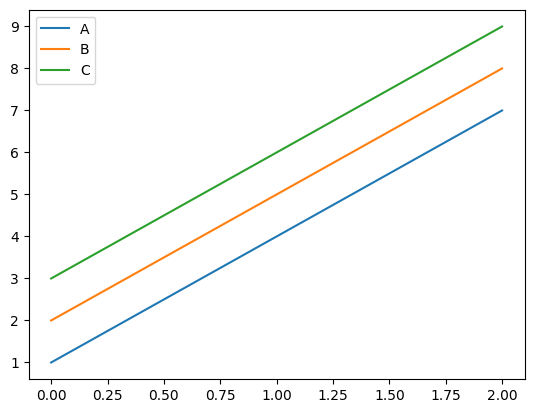

In [14]:
dataframe.plot()

In [15]:
dataframe.mean()

A    4.0
B    5.0
C    6.0
dtype: float64

In [17]:
dataframe.sort_values(by='C',ascending=False)

,A,B,C
2,7,8,9
1,4,5,6
0,1,2,3


You can export DataFrames using the to_csv() function:

In [16]:
dataframe.to_csv('exporteddataframe.csv')# if you use a file name only, the fild will be stored in the same folder as the jpynb file.

You have very many options, e.g., choosing your encoding character set, change the separator, turning line numbers and the headers on or off, and compress the file:

In [18]:
dataframe.to_csv('exportedoptions.csv', sep=';', encoding='latin_1', index=False, header=False, compression='zip')

Attention: Whenever you use options other than the standard, you need to specify them on import. This import command mostly looks the same. However, pandas automatically recognizes the lack of an index. To tell pandas that the first line is not supposed to be a header, you write header<font color=#a2f>=</font><font color="green"><b>None</b></font> instead of header<font color=#a2f>=</font><font color="green"><b>False</b></font>:"

In [29]:
c_list = pd.read_table('exportedoptions.csv', sep=';', encoding='latin_1', header=None, compression='zip')

In [30]:
c_list

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


You can convert DataFrames to numpy arrays using

In [23]:
c_nparray = c_list.to_numpy
print(c_nparray)

<bound method DataFrame.to_numpy of    0  1  2
0  1  2  3
1  4  5  6
2  7  8  9>


Note that this method also adds the line numbers to the matrix. To remove them, hide the index using the style function of DataFrames in pandas:

In [24]:
c_list.style.hide(axis='index')
c_nparray = c_list.to_numpy()
print(c_nparray)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Note that many libraries can handle DataFrames as if they were lists or numpy arrays. Natively, python can carry out matrix multiplication:

In [31]:
c_list*[2,0,2]

,0,1,2
0,2,0,6
1,8,0,12
2,14,0,18


The sklearn library, which contains a large number of standard machine learning functions, accepts either DataFrames or numpy arrays. The following example is a random forest classifier that reads one CSV file that contains a five-dimensional feature vector (f1 to f5) and the respective class for each item (line) of a dataset:

In [32]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
drumtypes = pd.read_csv('mfccs.csv')
y = drumtypes['class']#these are the class labels that need to be predicted by the clasifier
X = drumtypes.drop(['class'], axis = 1)#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)
rf = RandomForestClassifier()#load an instance of the RF classifier
rf.fit(X_train, y_train)
print(f'Train Accuracy: {rf.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {rf.score(X_test, y_test):.3f}')

Train Accuracy: 1.000
Test Accuracy: 0.844


Off topic: When you insert file paths, it is meaningful to use <i>raw</i> strings like <font color="red">r'c:\users\name\file.csv'</font>. Here, the <i>r</i> means "raw" and tells python not to use "escape sequences". Escape sequences are sequences to format or layout a text. Examples can be found below:

In [33]:
text='i\nj\tk'
print(text)
print(repr(text))
print(r'i\nj\tk')

i
j	k
'i\nj\tk'
i\nj\tk


Here, the <font color="red">\n</font> means "new line", the <font color="red">\t</font> means "tab space". To read the raw text, ignoring the escape sequence, you use <font color="red">r''</font> for strings and <font color="green">repr</font>() for calling variables.